In [1]:
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error 
from scipy.spatial.distance import pdist,squareform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Q1, Q2, Q3 & Q4.) Implementing the Clustering Algorithms and Testing with the Datasets.

#### Clustering Algorithms

In [2]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.cluster import AgglomerativeClustering

#### IRIS Dataset

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
K-Means Cluster analysis (when init is '

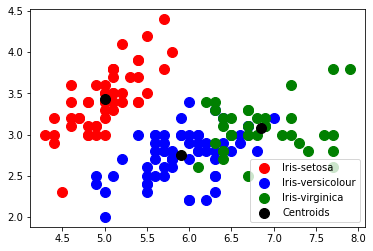

Distortion: 26.59
Silhouette Score for Elbow method (when init is random) = 0.30441240438199774
Time Taken for Elbow method (when init is 'random'): 0.17133831977844238


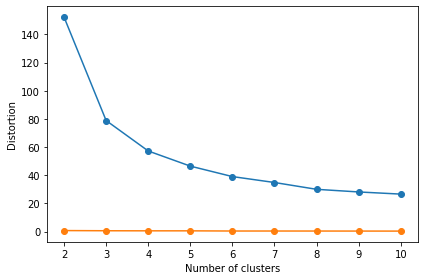

K-Means Cluster analysis for k-means (when init is 'k-means++') are:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Cluster Centers for k-means (when init is 'k-means++') are:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Sum of Squared Errors for the K-means(when init is k-means++) = 78.851
Silhouette Score for K-means(when init is k-means++) = 0.5528190123564095
Time Taken for K-means (when init is 'k-means++'): 0.025522708892822266


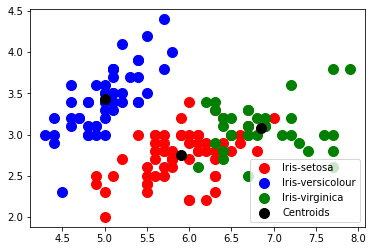

Distortion: 26.09
Silhouette Score for Elbow method (when init is k-means++) = 0.3312211058478364
Time Taken for Elbow method (when init is 'k-means++'): 0.3763751983642578


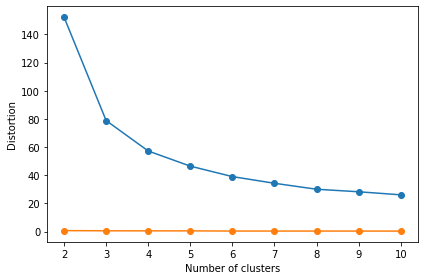

[0.53851648 0.50990195 0.64807407 ... 0.6164414  0.64031242 0.76811457]
          0         1         2         3         4         5         6    \
0    0.000000  0.538516  0.509902  0.648074  0.141421  0.616441  0.519615   
1    0.538516  0.000000  0.300000  0.331662  0.608276  1.090871  0.509902   
2    0.509902  0.300000  0.000000  0.244949  0.509902  1.086278  0.264575   
3    0.648074  0.331662  0.244949  0.000000  0.648074  1.166190  0.331662   
4    0.141421  0.608276  0.509902  0.648074  0.000000  0.616441  0.458258   
..        ...       ...       ...       ...       ...       ...       ...   
145  4.654031  4.700000  4.864155  4.745524  4.701064  4.284857  4.796874   
146  4.276681  4.249706  4.430576  4.288356  4.330127  3.988734  4.384062   
147  4.459821  4.498889  4.661545  4.533211  4.504442  4.102438  4.593474   
148  4.650806  4.718050  4.848711  4.719110  4.678675  4.264974  4.749737   
149  4.140048  4.153312  4.298837  4.149699  4.173727  3.818377  4.217819   

   

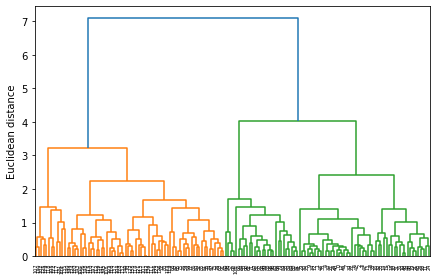

hierarchical Cluster analysis (when scikit library) are:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette Score for Hierarchical approach (when scikit library) = 0.5135953221192214
Time Taken for hierarchical (when scikit library): 0.0025489330291748047


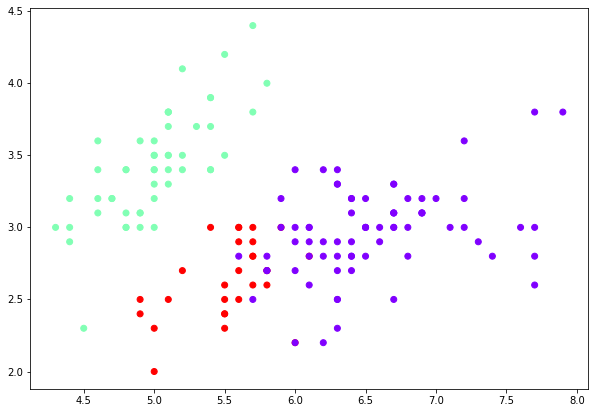

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df)

# ### Pre-Processing the Data

X = iris.data
y = iris.target
# X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

### K-means
    # K-means when init is 'random'

begin_time = time.time()
km1 = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
# X_train_km1 = km1.fit_transform(X_train_std)
# X_test_km1 = km1.transform(X_test_std)
y_km1 = km1.fit_predict(X)
silhouette_avg = silhouette_score(X, y_km1)
end_time = time.time()
time_taken = end_time - begin_time
print("K-Means Cluster analysis (when init is 'random') are:\n", y_km1)
print("Cluster Centers for k-means (when init is 'random') are:\n", km1.cluster_centers_ )
print('Sum of Squared Errors for the K-means(when init is random) = %.3f' %km1.inertia_)
print(f"Silhouette Score for K-means(when init is random) = {silhouette_avg}")
print("Time Taken for K-means (when init is 'random'):", time_taken)

plt.scatter(X[y_km1   == 0, 0], X[y_km1 == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_km1   == 1, 0], X[y_km1 == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_km1   == 2, 0], X[y_km1 == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(km1.cluster_centers_[:,   0], km1.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

### Elbow Method for random initialization

begin_time = time.time()
distortions = []
silhouette_list = []
for i in range(2, 11):
    km1 = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    y_km1 = km1.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_km1)
    distortions.append(km1.inertia_)
    silhouette_list.append(silhouette_avg)
end_time = time.time()
time_taken = end_time - begin_time
print('Distortion: %.2f' % km1.inertia_)
print(f"Silhouette Score for Elbow method (when init is random) = {silhouette_avg}")
print("Time Taken for Elbow method (when init is 'random'):", time_taken)

plt.plot(range(2, 11), distortions, marker='o')
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

    # K-means when init is 'k-means++'

begin_time = time.time()
km2 = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
# X_train_km2 = km2.fit_transform(X_train_std)
# X_test_km2 = km2.transform(X_test_std)
y_km2 = km2.fit_predict(X)
silhouette_avg = silhouette_score(X, y_km2)
end_time = time.time()
time_taken = end_time - begin_time
print("K-Means Cluster analysis for k-means (when init is 'k-means++') are:\n", y_km2)
print("Cluster Centers for k-means (when init is 'k-means++') are:\n", km2.cluster_centers_ )
print('Sum of Squared Errors for the K-means(when init is k-means++) = %.3f' %km2.inertia_)
print(f"Silhouette Score for K-means(when init is k-means++) = {silhouette_avg}")
print("Time Taken for K-means (when init is 'k-means++'):", time_taken)

plt.scatter(X[y_km2   == 0, 0], X[y_km2 == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_km2   == 1, 0], X[y_km2 == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_km2   == 2, 0], X[y_km2 == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(km2.cluster_centers_[:,   0], km2.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()


### Elbow Method for K-means++  initialization

begin_time = time.time()
distortions = []
silhouette_list = []
for i in range(2, 11):
    km2 = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    y_km2 = km2.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_km2)
    distortions.append(km2.inertia_)
    silhouette_list.append(silhouette_avg)
end_time = time.time()
time_taken = end_time - begin_time
print('Distortion: %.2f' % km2.inertia_)
print(f"Silhouette Score for Elbow method (when init is k-means++) = {silhouette_avg}")
print("Time Taken for Elbow method (when init is 'k-means++'):", time_taken)

plt.plot(range(2, 11), distortions, marker='o')
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()


### hierarchical approach using SciPy library

begin_time = time.time()
pair_wise_dist_condensed_form = pdist(iris_df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(pair_wise_dist_condensed_form))
distance_matrix = linkage(pair_wise_dist_condensed_form, method = 'complete', metric = 'euclidean')
dn = dendrogram(distance_matrix)
max_d = 2.5
cluster1 = fcluster(distance_matrix, max_d, criterion = 'distance')
silhouette_avg1 = silhouette_score(iris_df, cluster1)
k = 2
cluster2 = fcluster(distance_matrix, k, criterion = 'maxclust')
silhouette_avg2 = silhouette_score(iris_df, cluster2)
end_time = time.time()
time_taken = end_time - begin_time
print(pair_wise_dist_condensed_form)
print(row_dist)
print("The distance matrix for hierarchical (using SciPy library) is:\n", distance_matrix)
print("No. of clusters in cluster1 are:\n", cluster1)
print("No. of clusters in cluster2 are:\n", cluster2)
print("Silhouette Score for Hierarchical approach for cluster1 (using SciPy library) is:\n", silhouette_avg1)
print("Silhouette Score for Hierarchical approach for cluster2 (using SciPy library) is:\n", silhouette_avg2)
print("Time Taken for hierarchical (using SciPy library) is:", time_taken)
plt.tight_layout()
plt.ylabel('Euclidean distance') 
plt.show()


### hierarchical approach using scikit library

begin_time = time.time()
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
cluster_labels = cluster.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
end_time = time.time()
time_taken = end_time - begin_time
print("hierarchical Cluster analysis (when scikit library) are:\n", cluster_labels)
print(f"Silhouette Score for Hierarchical approach (when scikit library) = {silhouette_avg}")
print("Time Taken for hierarchical (when scikit library):", time_taken)

plt.figure(figsize = (10, 7))
plt.scatter(X[:, 0], X[:, 1], c = cluster.labels_, cmap = 'rainbow')
plt.show()


#### MNIST Dataset

K-Means Cluster analysis are:
 [2 2 1 ... 2 0 1]
Cluster Centers are:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Sum of Squared Errors for the K-means(when init is random) = 21392925381.585
Silhouette Score for K-means (when init is random) = 0.0538725032626538
Time Taken for K-means (when init is 'random'): 2.942028284072876


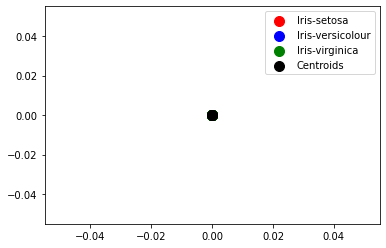

Distortion: 17839831688.70
Silhouette Score for Elbow method (when init is random): 0.05728370424912553
Time Taken for Elbow method (when init is 'random'): 33.82208228111267


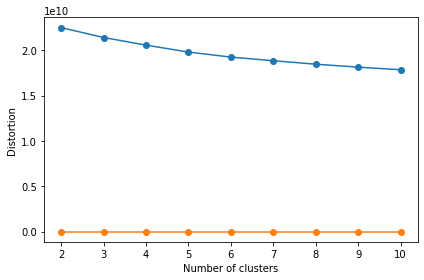

K-Means Cluster analysis for k-means++ are:
 [0 0 1 ... 0 2 1]
Cluster Centers for k-means++ are:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Sum of Squared Errors for the K-means(when init is k-means++) = 21392906205.685
Silhouette Score for K-means (when init is k-means++) = 0.05394581657862128
Time Taken for K-means (when init is 'k-means++'): 3.934473991394043


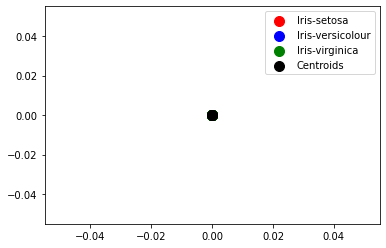

Distortion: 17838960304.95
Silhouette Score for Elbow method (when init is k-means++): 0.057724208916188915
Time Taken for Elbow method (when init is 'random'): 40.63009452819824


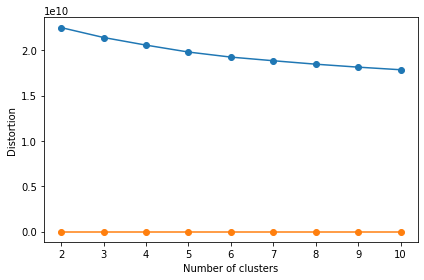

[2617.04967473 2635.7693374  3030.75601129 ... 2803.1692778  2544.28811262
 2556.77061936]
             0            1            2            3            4     \
0        0.000000  2617.049675  2635.769337  3030.756011  3041.773989   
1     2617.049675     0.000000  2489.109680  3392.753307  2881.896945   
2     2635.769337  2489.109680     0.000000  3032.648018  2588.631878   
3     3030.756011  3392.753307  3032.648018     0.000000  3201.067791   
4     3041.773989  2881.896945  2588.631878  3201.067791     0.000000   
...           ...          ...          ...          ...          ...   
6995  2717.343372  2542.668284  2171.647531  3243.013568  2563.002926   
6996  2629.014834  2711.085391  2453.385212  3311.399553  2980.430841   
6997  2799.776598  2559.595281  2528.716868  3617.401968  2692.054977   
6998  2837.369380  2748.674590  2547.378849  3161.147418  2541.390564   
6999  2919.290839  2417.792795  1896.958882  3414.371245  2732.371131   

             5            6     

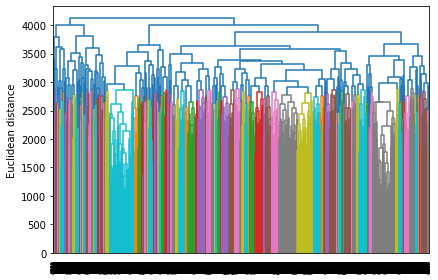

hierarchical Cluster analysis (when scikit library) are:
 [2 1 1 ... 1 2 1]
Silhouette Score for Hierarchical approach (when scikit library) = 0.03990519064866055
Time Taken for hierarchical (when scikit library): 22.791818857192993


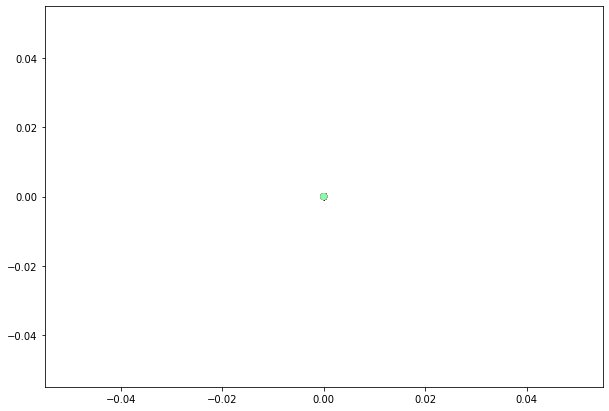

In [4]:
mist = fetch_openml('mnist_784', version = 1)
# print('MNIST keys:', list(mist.keys()))
# print('MNIST features:', mist.feature_names)
mist.data.shape
X = mist.data
y = mist.target

### Pre-Processing the Data

X_train, _, y_train, _ = train_test_split(X, y, test_size = 0.90, random_state = 1, stratify = y)
X = np.array(X_train.copy())
y = np.array(y_train.copy())


### K-means
    # K-means when init is 'random'

begin_time = time.time()
km1 = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
# X_train_km1 = km1.fit_transform(X_train_std)
# X_test_km1 = km1.transform(X_test_std)
y_km1 = km1.fit_predict(X)
silhouette_avg = silhouette_score(X, y_km1)
end_time = time.time()
time_taken = end_time - begin_time
print("K-Means Cluster analysis are:\n", y_km1)
print("Cluster Centers are:\n", km1.cluster_centers_ )
print('Sum of Squared Errors for the K-means(when init is random) = %.3f' %km1.inertia_)
print(f"Silhouette Score for K-means (when init is random) = {silhouette_avg}")
print("Time Taken for K-means (when init is 'random'):", time_taken)

plt.scatter(X[y_km1   == 0, 0], X[y_km1 == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_km1   == 1, 0], X[y_km1 == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_km1   == 2, 0], X[y_km1 == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(km1.cluster_centers_[:,   0], km1.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

### Elbow Method for random initialization

begin_time = time.time()
distortions = []
silhouette_list = []
for i in range(2, 11):
    km1 = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    y_km1 = km1.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_km1)
    distortions.append(km1.inertia_)
    silhouette_list.append(silhouette_avg)
end_time = time.time()
time_taken = end_time - begin_time
print('Distortion: %.2f' % km1.inertia_)
# print('Silhouette Score for Elbow method (when init is random): %.3f' % silhouette_avg)
print(f'Silhouette Score for Elbow method (when init is random): {silhouette_avg}')
print("Time Taken for Elbow method (when init is 'random'):", time_taken)

plt.plot(range(2, 11), distortions, marker='o')
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## K-means when init is 'k-means++'

begin_time = time.time()
km2 = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
# X_train_km2 = km2.fit_transform(X_train_std)
# X_test_km2 = km2.transform(X_test_std)
y_km2 = km2.fit_predict(X)
silhouette_avg = silhouette_score(X, y_km2)
end_time = time.time()
time_taken = end_time - begin_time
print("K-Means Cluster analysis for k-means++ are:\n", y_km2)
print("Cluster Centers for k-means++ are:\n", km2.cluster_centers_ )
print('Sum of Squared Errors for the K-means(when init is k-means++) = %.3f' %km2.inertia_)
print(f"Silhouette Score for K-means (when init is k-means++) = {silhouette_avg}")
print("Time Taken for K-means (when init is 'k-means++'):", time_taken)

plt.scatter(X[y_km2   == 0, 0], X[y_km2 == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_km2   == 1, 0], X[y_km2 == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_km2   == 2, 0], X[y_km2 == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(km2.cluster_centers_[:,   0], km2.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

### Elbow Method for K-means++  initialization

begin_time = time.time()
distortions = []
silhouette_list = []
for i in range(2, 11):
    km2 = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    y_km2 = km2.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_km2)
    distortions.append(km2.inertia_)
    silhouette_list.append(silhouette_avg)
end_time = time.time()
time_taken = end_time - begin_time
print('Distortion: %.2f' % km2.inertia_)
print(f'Silhouette Score for Elbow method (when init is k-means++): {silhouette_avg}')
print("Time Taken for Elbow method (when init is 'random'):", time_taken)

plt.plot(range(2, 11), distortions, marker='o')
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### hierarchical approach using SciPy library

begin_time = time.time()
pair_wise_dist_condensed_form = pdist(X, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(pair_wise_dist_condensed_form))
distance_matrix = linkage(pair_wise_dist_condensed_form, method = 'complete', metric = 'euclidean')
dn = dendrogram(distance_matrix)
max_d = 2.5
cluster1 = fcluster(distance_matrix, max_d, criterion = 'distance')
# silhouette_avg1 = silhouette_samples(X, cluster1)
k = 2
cluster2 = fcluster(distance_matrix, k, criterion = 'maxclust')
# silhouette_avg2 = silhouette_samples(X, cluster2)
end_time = time.time()
time_taken = end_time - begin_time
print(pair_wise_dist_condensed_form)
print(row_dist)
print("The distance matrix for hierarchical is:\n", distance_matrix)
print("No. of clusters in cluster1 are:\n", cluster1)
print("No. of clusters in cluster2 are:\n", cluster2)
# print("Silhouette Score for Hierarchical approach for cluster1 (using SciPy library) is:\n", silhouette_score(X, cluster1))
# print("Silhouette Score for Hierarchical approach for cluster2 (using SciPy library) is:\n", silhouette_score(X, cluster2))
print("Time Taken for hierarchical (using SciPy library) is:", time_taken)
plt.tight_layout()
plt.ylabel('Euclidean distance') 
plt.show()


### hierarchical approach using scikit library

begin_time = time.time()
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
cluster_labels = cluster.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
end_time = time.time()
time_taken = end_time - begin_time
print("hierarchical Cluster analysis (when scikit library) are:\n", cluster_labels)
print(f"Silhouette Score for Hierarchical approach (when scikit library) = {silhouette_avg}")
print("Time Taken for hierarchical (when scikit library):", time_taken)

plt.figure(figsize = (10, 7))
plt.scatter(X[:, 0], X[:, 1], c = cluster.labels_, cmap = 'rainbow')
plt.show()